In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import csv
import math
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('SteamEnglishReviews.csv')
print(df.head())

   Unnamed: 0                  app_name language  \
0           3  The Witcher 3: Wild Hunt  english   
1           5  The Witcher 3: Wild Hunt  english   
2           6  The Witcher 3: Wild Hunt  english   
3          18  The Witcher 3: Wild Hunt  english   
4          20  The Witcher 3: Wild Hunt  english   

                                              review  timestamp_created  \
0  One of the best RPG's of all time, worthy of a...         1611379970   
1             good story, good graphics. lots to do.         1611379264   
2                                           dis gud,         1611379091   
3  favorite game of all time cant wait for the Ne...         1611373086   
4                          Why wouldn't you get this         1611371978   

   timestamp_updated  recommended  votes_helpful  votes_funny  comment_count  \
0         1611379970         True              0            0              0   
1         1611379264         True              0            0              0

In [2]:
print (df.columns)

Index(['Unnamed: 0', 'app_name', 'language', 'review', 'timestamp_created',
       'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny',
       'comment_count', 'steam_purchase', 'received_for_free',
       'written_during_early_access', 'author.num_games_owned',
       'author.num_reviews', 'author.playtime_forever',
       'author.playtime_last_two_weeks', 'author.playtime_at_review',
       'author.last_played'],
      dtype='object')


In [126]:
df

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,3,The Witcher 3: Wild Hunt,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,0,True,False,False,5,3,5587.0,3200.0,5524.0,1.611384e+09
1,5,The Witcher 3: Wild Hunt,english,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,0,0,True,False,False,11,1,823.0,823.0,823.0,1.611379e+09
2,6,The Witcher 3: Wild Hunt,english,"dis gud,",1611379091,1611379091,True,0,0,0,True,False,False,27,2,4192.0,3398.0,4192.0,1.611352e+09
3,18,The Witcher 3: Wild Hunt,english,favorite game of all time cant wait for the Ne...,1611373086,1611373086,True,0,0,0,True,False,False,33,1,23329.0,177.0,23329.0,1.611219e+09
4,20,The Witcher 3: Wild Hunt,english,Why wouldn't you get this,1611371978,1611371978,True,0,0,0,True,False,False,131,2,8557.0,2004.0,8557.0,1.611371e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780435,19999987,The Elder Scrolls V: Skyrim Special Edition,english,I WANT A REFUND\n,1588779455,1588779455,False,0,1,0,True,False,False,15,2,1653.0,0.0,217.0,1.593258e+09
8780436,19999989,The Elder Scrolls V: Skyrim Special Edition,english,You know you want it.,1588778760,1588778760,True,1,1,0,False,False,False,64,1,2969.0,0.0,1163.0,1.589317e+09
8780437,19999990,The Elder Scrolls V: Skyrim Special Edition,english,Very cool dragon and theft,1588777285,1588777285,True,0,0,0,True,False,False,32,6,1165.0,0.0,1063.0,1.598537e+09
8780438,19999994,The Elder Scrolls V: Skyrim Special Edition,english,The game is great,1588776021,1588776021,True,0,0,0,True,False,False,25,7,1861.0,0.0,768.0,1.603818e+09


In [3]:
df.describe()

,Unnamed: 0,timestamp_created,timestamp_updated,votes_helpful,votes_funny,comment_count,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780438e+06,8.780438e+06,8.769680e+06,8.780438e+06
mean,9.857102e+06,1.539505e+09,1.543040e+09,5.008932e+05,1.291368e+05,1.293550e-01,1.502837e+06,5.009029e+05,1.636568e+04,1.651123e+02,9.160439e+03,1.577832e+09
std,5.773377e+06,6.434651e+07,6.293887e+07,1.484232e+09,2.355034e+07,2.036609e+00,2.570764e+09,1.484232e+09,3.996454e+04,7.713387e+02,2.592765e+04,5.366909e+07
min,3.000000e+00,1.290198e+09,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.153034e+06,1.498343e+09,1.504905e+09,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.000000e+00,1.299000e+03,0.000000e+00,5.980000e+02,1.569880e+09
50%,9.572375e+06,1.562131e+09,1.568998e+09,0.000000e+00,0.000000e+00,0.000000e+00,8.100000e+01,4.000000e+00,4.431000e+03,0.000000e+00,1.972000e+03,1.599436e+09
75%,1.529647e+07,1.591020e+09,1.592911e+09,1.000000e+00,0.000000e+00,0.000000e+00,1.870000e+02,1.100000e+01,1.496100e+04,0.000000e+00,7.126000e+03,1.609085e+09
max,2.000000e+07,1.611425e+09,2.117308e+09,4.398047e+12,4.294967e+09,1.432000e+03,4.398047e+12,4.398047e+12,3.744943e+06,2.375400e+04,3.228103e+06,1.611430e+09


## Removing Outliers

In [4]:
#30000
recs = df["votes_helpful"]
unique, counts = np.unique(recs, return_counts=True)
print(unique)

[            0             1             2 ...         28211         29608
 4398046511106]


In [5]:
#16000
recs = df["votes_funny"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[1650:])

[     13635      13795      13806      14376      15417      15707
 4294967288 4294967289 4294967290 4294967291 4294967292 4294967293
 4294967294 4294967295]


In [6]:
#6000
recs = df["author.num_reviews"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[720:])

[         3764          3766          3767          3772          3774
          4137          5236 4398046511105]


In [7]:
#23000
recs = df["author.num_games_owned"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[5700:])

[        15523         15524         15871         15874         15887
         15919         15992         16113         16615         16617
         16811         16818         16821         16869         17197
         17206         17239         17312         17314         17318
         17319         17320         17321         17340         17343
         17344         17767         18640         18664         18666
         18956         19022         19024         19451         19465
         20391         20417         20420         20969         20972
         21865         21979         21980         22024 4398046511151
 4398046511170 4398046511619]


In [8]:
recs = df["author.playtime_at_review"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[100000:])

[102338. 102339. 102340. ...     nan     nan     nan]


In [9]:
# Dropped all of the outliers in the dataset
df = df[df["votes_helpful"] < 30000]
df = df[df["votes_funny"] < 16000]
df = df[df["author.num_reviews"] < 6000]
df = df[df["author.num_games_owned"] < 23000]
# Get rid of the nan playtime values
df = df[np.isnan(df["author.playtime_at_review"]) == False]
# 10 years of play time
df = df[df["author.playtime_at_review"] < 60000]

In [10]:
classifier_cols = ["votes_helpful", "votes_funny", "author.num_reviews", "author.num_games_owned", "author.playtime_at_review"]

In [11]:
df.describe()

,Unnamed: 0,timestamp_created,timestamp_updated,votes_helpful,votes_funny,comment_count,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502029e+06,8.502029e+06,8.502031e+06,8.502029e+06
mean,9.870912e+06,1.539283e+09,1.542497e+09,1.793062e+00,7.550092e-01,1.245168e-01,1.640030e+02,1.175650e+01,1.203496e+04,1.387828e+02,5.858401e+03,1.577191e+09
std,5.763546e+06,6.444947e+07,6.319413e+07,4.427301e+01,3.345614e+01,1.956048e+00,3.085293e+02,3.480477e+01,2.293986e+04,6.578127e+02,9.740206e+03,5.316229e+07
min,3.000000e+00,1.290198e+09,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.174430e+06,1.498099e+09,1.503770e+09,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.000000e+00,1.248000e+03,0.000000e+00,5.730000e+02,1.567947e+09
50%,9.581016e+06,1.562080e+09,1.566538e+09,0.000000e+00,0.000000e+00,0.000000e+00,8.200000e+01,5.000000e+00,4.140000e+03,0.000000e+00,1.846000e+03,1.598745e+09
75%,1.528021e+07,1.591210e+09,1.592918e+09,1.000000e+00,0.000000e+00,0.000000e+00,1.890000e+02,1.100000e+01,1.324400e+04,0.000000e+00,6.236000e+03,1.608913e+09
max,2.000000e+07,1.611425e+09,2.117308e+09,2.960800e+04,1.570700e+04,1.432000e+03,2.202400e+04,5.236000e+03,2.376680e+06,2.235300e+04,5.999900e+04,1.611430e+09


## Dataset Analysis

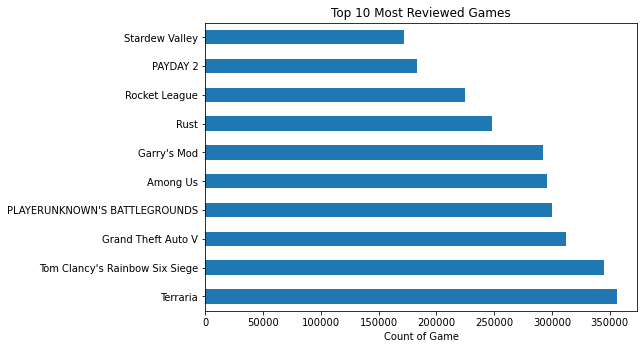

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title("Top 10 Most Reviewed Games")
plt.xlabel('Count of Game')
df['app_name'].value_counts()[:10].plot(kind='barh')

In [13]:
recs = df["recommended"]
unique, counts = np.unique(recs, return_counts=True)
print("Non-recommendations:", counts[0], "Recommendations:", counts[1])
# Keep the split how it is

Non-recommendations: 896085 Recommendations: 7605946


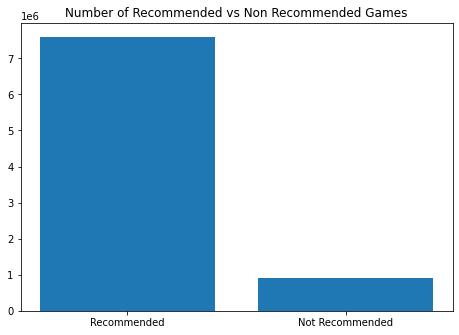

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.title("Number of Recommended vs Non Recommended Games")

unique, counts = np.unique(df["recommended"], return_counts=True)
sizes = [counts[1], counts[0]]
labels = ['Recommended', 'Not Recommended']

ax.bar(labels,sizes)
plt.show()

## Trimming dataset down

In [15]:
not_rec = df[df["recommended"]==0]
num_no_rec= len(not_rec)

#sample function shuffles the values
yes_rec = df[df["recommended"]==1].sample(frac=1)[0:num_no_rec]

# Cuts the dataset down to 500000 values while keeping the ratio of recommended vs nonrecommended
var = int((num_no_rec/len(df)) * 500000)
no_split = not_rec.sample(frac=1)[0:var]
yes_split = df[df["recommended"]==1].sample(frac=1)[0:500000 - var]

df_equal = pd.concat([no_split,yes_split])

In [16]:
recs = df_equal["recommended"]
unique, counts = np.unique(recs, return_counts=True)
print("Non-recommendations:", counts[0], "Recommendations:", counts[1])
# Keep the split how it is

Non-recommendations: 52698 Recommendations: 447302


In [17]:
df_equal

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
7525710,17273370,Fallout 4,english,This isin't fallout. This is shit.,1469896666,1469896666,False,10,1,0,True,False,False,723,86,7290.0,0.0,4885.0,1.564387e+09
6572808,15252832,PLAYERUNKNOWN'S BATTLEGROUNDS,english,bit bad,1505755598,1505755598,False,1,1,0,True,False,True,36,6,77.0,0.0,77.0,1.504273e+09
3574163,7840611,Due Process,english,"game says it has to unpack the map, moving at ...",1610146533,1610146533,False,2,0,0,True,False,True,404,29,19.0,0.0,19.0,1.608958e+09
6185368,13400792,Grand Theft Auto V,english,for more information on the crack spiders bitc...,1530061939,1530061939,False,0,0,0,True,False,False,111,8,20348.0,0.0,17969.0,1.591506e+09
7071952,16378492,ARK: Survival Evolved,english,"(I don't personally recommend this game, but o...",1598392824,1598392824,False,0,0,0,False,False,False,74,10,1489.0,0.0,1104.0,1.601346e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730335,1660089,Sid Meier's Civilization V,english,Just plain good.,1466737336,1466737336,True,0,0,0,True,False,False,311,1,42785.0,0.0,33325.0,1.585435e+09
6971610,16182348,Stellaris,english,"""This new Space drug is great, YOU MUST TRY IT...",1463171552,1463171552,True,0,1,0,False,False,False,726,25,5081.0,0.0,3217.0,1.465828e+09
4973100,10705041,One Finger Death Punch,english,"1FDP, even it sounds like some adult industry ...",1434643854,1434643854,True,0,0,0,True,False,False,173,11,31.0,0.0,31.0,1.434643e+09
5549665,11915884,Ori and the Will of the Wisps,english,RIBBIT RIBBIT,1603529935,1603529935,True,0,0,0,True,False,False,17,5,405.0,0.0,227.0,1.603540e+09


In [18]:
#sample function shuffles the values
shuffled = df_equal.sample(frac=1)[0:len(df_equal)]

# Trimmed dataset for testing purposes
updated_df = shuffled[:5000]

## Normilazation

In [ ]:
# Normalize via l2 norm
# def normalize(x, cols):
#     for col in cols:
#         col_sum = x[col].sum()
#         for index, row in x.iterrows():
#             st = row[col]
#             new = st/col_sum
#             x.loc[index, [col]] = new
#     return x

# updated_df = normalize(updated_df, classifier_cols)

# updated_df

In [19]:
recs = updated_df["recommended"]
unique, counts = np.unique(recs, return_counts=True)
print("Non-recommendations:", counts[0], "Recommendations:", counts[1])

Non-recommendations: 531 Recommendations: 4469


In [20]:
updated_df["recommended"] = updated_df["recommended"].astype(int)

updated_df

<ipython-input-20-1f27a6c1c1d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df["recommended"] = updated_df["recommended"].astype(int)


,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
7455607,17152274,Fallout 4,english,ITS AMAZING SO COOL BUY IT ITS GOOD TRUST ME,1580950149,1580950149,1,0,0,0,True,False,False,97,5,26994.0,1070.0,24722.0,1.610586e+09
8260294,18913632,Terraria,english,Fun,1474497649,1474497649,1,0,0,0,True,False,False,15,1,5133.0,0.0,4842.0,1.489387e+09
738276,1674413,Sid Meier's Civilization V,english,The pinnacle of strategy games. I would highly...,1447978738,1447978738,1,0,0,0,True,False,False,43,6,16683.0,0.0,6398.0,1.565042e+09
8382059,19161592,PAYDAY 2,english,Game is pretty good.,1563326203,1563326203,1,1,0,0,False,True,False,31,24,4380.0,0.0,3951.0,1.597978e+09
7033454,16293430,Kingdom Come: Deliverance,english,git gud,1518561586,1518561586,1,1,0,0,True,False,False,630,20,2555.0,0.0,1174.0,1.607479e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2761198,6239520,Tom Clancy's Rainbow Six Siege,english,yeet,1575608946,1575608946,1,0,0,0,True,False,False,21,6,2307.0,0.0,281.0,1.604039e+09
1752826,3890794,RimWorld,english,"It's like prison architect but much, MUCH better.",1579392920,1579392920,1,1,0,0,True,False,False,43,1,29250.0,0.0,545.0,1.607461e+09
8640039,19714676,Hunt: Showdown,english,Not recommended for Arachnophobia\n\n10/10,1576323806,1576323806,1,2,0,0,False,False,False,219,19,451.0,0.0,256.0,1.576431e+09
7155814,16586109,ARK: Survival Evolved,english,"This game is utter shit, do not recommend.",1506550141,1506550141,0,0,1,0,True,False,False,81,2,58189.0,0.0,4991.0,1.586639e+09


## Sentiment Analysis

In [23]:
from textblob import TextBlob
#! pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

text = "I love you so much"

s = TextBlob("I love you so much")
print("Textblob:", s.sentiment)

s1 = SentimentIntensityAnalyzer()
sentiment_dict = s1.polarity_scores(text)
print("VADER:", sentiment_dict)
if sentiment_dict['compound'] >= 0.05 :
    print("Positive")

elif sentiment_dict['compound'] <= - 0.05 :
    print("Negative")

else :
    print("Neutral")

     |████████████████████████████████| 125 kB 733 kB/s eta 0:00:01
Textblob: Sentiment(polarity=0.35, subjectivity=0.4)
VADER: {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}
Positive


In [ ]:
#polarityT = [TextBlob(str(review)).polarity for review in updated_df["review"]]
#updated_df["polarityT"] = polarityT
#updated_df

In [24]:
polarityV = []
polarityV_label = []
s = SentimentIntensityAnalyzer()
for review in updated_df["review"]:
    sent_dict = s.polarity_scores(str(review))
    polarityV.append(sent_dict['compound'])
    
updated_df["polarityV"] = polarityV

updated_df

<ipython-input-24-55cd46d85e86>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df["polarityV"] = polarityV


,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,polarityV
7455607,17152274,Fallout 4,english,ITS AMAZING SO COOL BUY IT ITS GOOD TRUST ME,1580950149,1580950149,1,0,0,0,True,False,False,97,5,26994.0,1070.0,24722.0,1.610586e+09,0.9184
8260294,18913632,Terraria,english,Fun,1474497649,1474497649,1,0,0,0,True,False,False,15,1,5133.0,0.0,4842.0,1.489387e+09,0.5106
738276,1674413,Sid Meier's Civilization V,english,The pinnacle of strategy games. I would highly...,1447978738,1447978738,1,0,0,0,True,False,False,43,6,16683.0,0.0,6398.0,1.565042e+09,-0.2076
8382059,19161592,PAYDAY 2,english,Game is pretty good.,1563326203,1563326203,1,1,0,0,False,True,False,31,24,4380.0,0.0,3951.0,1.597978e+09,0.7269
7033454,16293430,Kingdom Come: Deliverance,english,git gud,1518561586,1518561586,1,1,0,0,True,False,False,630,20,2555.0,0.0,1174.0,1.607479e+09,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2761198,6239520,Tom Clancy's Rainbow Six Siege,english,yeet,1575608946,1575608946,1,0,0,0,True,False,False,21,6,2307.0,0.0,281.0,1.604039e+09,0.0000
1752826,3890794,RimWorld,english,"It's like prison architect but much, MUCH better.",1579392920,1579392920,1,1,0,0,True,False,False,43,1,29250.0,0.0,545.0,1.607461e+09,0.5346
8640039,19714676,Hunt: Showdown,english,Not recommended for Arachnophobia\n\n10/10,1576323806,1576323806,1,2,0,0,False,False,False,219,19,451.0,0.0,256.0,1.576431e+09,-0.1511
7155814,16586109,ARK: Survival Evolved,english,"This game is utter shit, do not recommend.",1506550141,1506550141,0,0,1,0,True,False,False,81,2,58189.0,0.0,4991.0,1.586639e+09,-0.7187


## Classification

In [25]:
data = updated_df[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels = updated_df["recommended"]

X = np.array(data)
Y = np.array(labels)

In [26]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.20)

model = KNeighborsClassifier(n_neighbors=9)

model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print(acc)
#precision and recall on a per class basis

0.899


In [ ]:
predicted = model.predict(x_test)
print(predicted)

In [ ]:
print(y_test)

## AdaBoost Classifier

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

data_ada = updated_df[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_ada = updated_df["recommended"]

X_ada = np.array(data_ada)
Y_ada = np.array(labels_ada)

X_train_ada, X_test_ada, y_train_ada, y_test_ada = sklearn.model_selection.train_test_split(X_ada, Y_ada, test_size=0.20, random_state=0)

In [46]:
# fit model no training data

no_vals = updated_df[updated_df["recommended"]==0]
yes_vals = updated_df[updated_df["recommended"]==1]

# Controls the balance of positive and negative weights as recommended by the xgboost docs
ratio = float(np.sum(len(no_vals))) / np.sum(len(yes_vals))

model = AdaBoostClassifier(n_estimators=100, random_state=0)
model.fit(X_train_ada, y_train_ada)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [47]:
# make predictions for test data
y_pred_ada = model.predict(X_test_ada)
y_pred_ada

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [48]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_ada, y_pred_ada))
print("Precision:",metrics.precision_score(y_test_ada, y_pred_ada))
print("Recall:",metrics.recall_score(y_test_ada, y_pred_ada))
print("F1:",metrics.f1_score(y_test_ada, y_pred_ada))

Accuracy: 0.906
Precision: 0.9186046511627907
Recall: 0.9808126410835214
F1: 0.9486899563318777
